<a href="https://colab.research.google.com/github/Gullen-Sw/Corpy-Co.inc-Assignment/blob/main/1800_categorical_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1794 files belonging to 6 classes.
Using 1436 files for training.
Found 1794 files belonging to 6 classes.
Using 358 files for validation.
Epoch 1/30
12/12 [==============================] - 90s 6s/step - loss: 4.6321 - accuracy: 0.1664 - val_loss: 1.8080 - val_accuracy: 0.1732
Epoch 2/30
12/12 [==============================] - 32s 1s/step - loss: 1.8199 - accuracy: 0.1825 - val_loss: 1.7489 - val_accuracy: 0.1872
Epoch 3/30
12/12 [==============================] - 33s 1s/step - loss: 1.7344 - accuracy: 0.2437 - val_loss: 1.7469 - val_accuracy: 0.2737
Epoch 4/30
12/12 [==============================] - 32s 1s/step - loss: 1.6521 - accuracy: 0.3391 - val_loss: 2.2463 - val_accuracy: 0.1592
Epoch 5/30
12/12 [==============================] - 32s 1s/step - loss: 1.6139 - accuracy: 0.3823 - val_loss: 1.7712 - val_accuracy: 0.2235
Epoch 6/30
12/12 [==============================] - 32s 1s/step - loss: 1.4646 - accuracy: 0.4352 - val_loss: 1.4616 - val_accuracy: 0.5642
Epoch 7/30
12/1

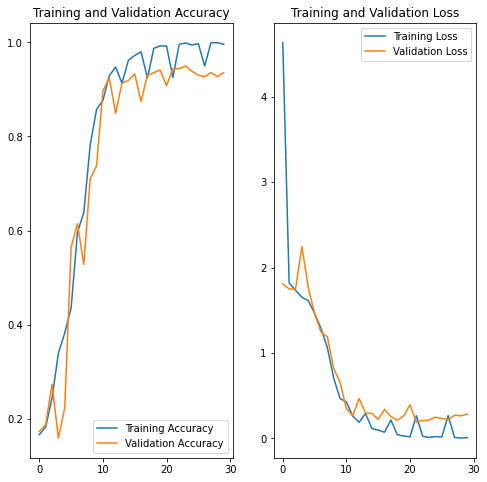

/content/drive/MyDrive/archive/test/origin/test_111.png
This image most likely belongs to good with a 99.88 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_102.png
This image most likely belongs to good with a 99.89 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_117.png
This image most likely belongs to good with a 93.22 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_119.png
This image most likely belongs to thread_side with a 99.63 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_107.png
This image most likely belongs to good with a 99.98 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_100.png
This image most likely belongs to good with a 99.63 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_116.png
This image most likely belongs to thread_side with a 56.71 percent confidence.
/content/drive/MyDrive/archive/test/origin/test_115.png
This image most likely belongs to 

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg

batch_size = 128
validation_rate = 0.2
img_height = 256
img_width = 256

data_dir = '/content/drive/MyDrive/archive/train/normal/Augmentation/diversity_equally_all_classes'
#data_dir = '/content/drive/MyDrive/archive/train/normal/Augmentation/diversity_equally_good_and_not_good'
test_dir = '/content/drive/MyDrive/archive/test/origin'

"""
data_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

test_gen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

train_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size = batch_size,
    target_size = (img_height, img_width),
    shuffle = True,
    seed = 42,
    subset = 'training'
)

validation_generator = data_gen.flow_from_directory(
    data_dir,
    batch_size = batch_size,
    target_size = (img_height, img_width),
    shuffle = True,
    seed = 42,
    subset = 'validation'
)

test_generator = test_gen.flow_from_directory(
    test_dir, 
    target_size = (img_height, img_width)
)
"""

train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode = 'categorical',
    validation_split = validation_rate,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'categorical',
  validation_split = validation_rate,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

model = keras.Sequential()
#model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width,3)))
#model.add(layers.experimental.preprocessing.RandomRotation(1))
#model.add(layers.experimental.preprocessing.RandomZoom(1))
model.add(layers.experimental.preprocessing.Rescaling(1/255))
model.add(layers.Conv2D(16, 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(padding = 'same'),)
#model.add(layers.Conv2D(16, 3, padding = 'same', activation='relu'))
#model.add(layers.MaxPooling2D(padding = 'same'))
#model.add(layers.Conv2D(32, 3, padding = 'same', activation='relu'))
#model.add(layers.MaxPooling2D(padding = 'same'))
model.add(layers.Conv2D(32, 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(padding = 'same'))
model.add(layers.Flatten())
"""
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation = 'softmax'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation = 'sigmoid'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation = 'relu'))
"""

model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(64, activation = "relu" ))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(6))

"""
model = Sequential([
    train_generator,
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(padding = 'same'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation = 'sigmoid')
])
"""

epochs = 30
model.compile(optimizer = keras.optimizers.RMSprop(1e-3),
              loss = keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

#model.compile(optimizer = keras.optimizers.RMSprop(1e-3),
#              loss = 'binary_crossentropy',
#              metrics = ['accuracy'])

history = model.fit(train_ds, batch_size = batch_size, epochs = epochs,  
                    validation_data = val_ds)
model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("/content/drive/MyDrive/archive/result.png")
plt.show()

lis_good = []
lis_ng = []

for file in os.listdir('/content/drive/MyDrive/archive/test/origin'):
    path = os.path.join('/content/drive/MyDrive/archive/test/origin', file)
    print(path)
    image = keras.preprocessing.image.load_img(
        path, target_size = (img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    """
    #Binary
    predictions = model.predict(img_array)
    print(predictions[0])

    if predictions[0] == 0:
        lis_good.append(file)
        print(lis_good + "is a good bolt.")
    else:
        lis_ng.append(file)
        print(lis_ng + "is a not good bolt.")
    """

    #Categorical
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
model.save('/content/drive/MyDrive/archive/result/categorical_result_1800/trial1.h5')

In [5]:
lis_good = []
lis_manupulated = []
lis_scratch_head = []
lis_scratch_neck = []
lis_thread_top = []
lis_thread_side = []

for file in os.listdir('/content/drive/MyDrive/archive/test/origin'):
    path = os.path.join('/content/drive/MyDrive/archive/test/origin', file)
    print(path)
    image = keras.preprocessing.image.load_img(
        path, target_size = (img_height, img_width)
    )
    img_array = keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    #Categorical
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    if class_names[np.argmax(score)] == 'good':
        lis_good.append(file)
    elif class_names[np.argmax(score)] == 'thread_top':
        lis_thread_top.append(file)
    elif class_names[np.argmax(score)] == 'thread_side':
        lis_thread_side.append(file)
    elif class_names[np.argmax(score)] == 'scratch_head':
        lis_scratch_head.append(file)
    elif class_names[np.argmax(score)] == 'scratch_neck':
        lis_scratch_neck.append(file)
    elif  class_names[np.argmax(score)] == 'manupulated':
        lis_manupulated.append(file)

print('good : ', lis_good)
print('thread_top : ', lis_thread_top)
print('thread_side : ', lis_thread_side)
print('scratch_neck : ', lis_scratch_neck)
print('scratch_head : ', lis_scratch_head)
print('manupulated : ', lis_manupulated)


/content/drive/MyDrive/archive/test/origin/test_111.png
/content/drive/MyDrive/archive/test/origin/test_102.png
/content/drive/MyDrive/archive/test/origin/test_117.png
/content/drive/MyDrive/archive/test/origin/test_119.png
/content/drive/MyDrive/archive/test/origin/test_107.png
/content/drive/MyDrive/archive/test/origin/test_100.png
/content/drive/MyDrive/archive/test/origin/test_116.png
/content/drive/MyDrive/archive/test/origin/test_115.png
/content/drive/MyDrive/archive/test/origin/test_11.png
/content/drive/MyDrive/archive/test/origin/test_108.png
/content/drive/MyDrive/archive/test/origin/test_12.png
/content/drive/MyDrive/archive/test/origin/test_104.png
/content/drive/MyDrive/archive/test/origin/test_113.png
/content/drive/MyDrive/archive/test/origin/test_110.png
/content/drive/MyDrive/archive/test/origin/test_112.png
/content/drive/MyDrive/archive/test/origin/test_10.png
/content/drive/MyDrive/archive/test/origin/test_1.png
/content/drive/MyDrive/archive/test/origin/test_109.p